# Dataset

Download dataset

In [10]:
import os
if not os.path.isfile('dognition_data_aggregated_by_dogid.xlsx'):
  ! gdown 1aqPah5aYlkvTiT9MLrOVfC4_NZYBQT0q

Load and dispaly dataset

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dognition_data_aggregated_by_dogid dataset
data_path = 'dognition_data_aggregated_by_dogid.xlsx'
dognition_data = pd.read_excel(data_path)

# Display the first few rows of the dataset to understand its structure
dognition_data.head()


,Dog ID,Total Tests Completed,Mean ITI (days),Mean ITI (minutes),Median ITI (days),Median ITI (minutes),Time diff between first and last game (days),Time diff between first and last game (minutes),User ID,Gender,...,Membership_ID,Subscribed,City,State,Zip,Country,Exclude,Free_Start_User,Last_Active_At,Membership_Type
0,fd27b272-7144-11e5-ba71-058fbc01cf0b,21,28.201076,40609.549167,0.004687,6.750000,564.021516,812190.983333,ce134e42-7144-11e5-ba71-058fbc01cf0b,female,...,2.0,1.0,Grand Forks,ND,58201,US,0,0,2015-03-12 00:25:00,2
1,fd27b5ba-7144-11e5-ba71-058fbc01cf0b,20,0.413307,595.162281,0.005845,8.416667,7.852836,11308.083333,ce1353d8-7144-11e5-ba71-058fbc01cf0b,male,...,1.0,1.0,Barre,MA,01005,US,0,0,00:00:00,1
2,fd27b6b4-7144-11e5-ba71-058fbc01cf0b,2,0.009132,13.150000,0.009132,13.150000,0.009132,13.150000,ce135ab8-7144-11e5-ba71-058fbc01cf0b,male,...,1.0,1.0,Darien,CT,06820,US,0,0,00:00:00,1
3,fd27b79a-7144-11e5-ba71-058fbc01cf0b,11,56.115179,80805.858333,0.004433,6.383333,561.151794,808058.583333,ce13507c-7144-11e5-ba71-058fbc01cf0b,male,...,1.0,1.0,Winnetka,IL,60093,US,0,0,2014-09-12 19:26:00,1
4,fd27b86c-7144-11e5-ba71-058fbc01cf0b,31,7.734254,11137.326111,0.000399,0.575000,232.027627,334119.783333,ce135e14-7144-11e5-ba71-058fbc01cf0b,female,...,2.0,1.0,Raleigh,NC,27606,US,1,0,00:00:00,2


# Exercise 1



## Counting Unique Dogs and Users:

Let's start by calculating the number of unique Dog IDs and User IDs in the dataset.

In [17]:
# Calculate the number of unique Dog IDs and User IDs
unique_dogs_count = dognition_data['Dog ID'].nunique()
unique_users_count = dognition_data['User ID'].nunique()

unique_dogs_count, unique_users_count

(17986, 16261)

1. **Number of Unique Dogs**: The dataset contains **17,986** unique dogs.
2. **Number of Unique Users**: There are **16,261** unique human users in the dataset.

The difference in the number of unique Dog IDs and User IDs suggests that some users have registered more than one dog. This could be important for understanding user behavior and the usage patterns of the platform.

## Analyzing Countries and States
Analyze Country and State data to understand the geographical distribution and identify any anomalies.


Let's start by analyzing the country and state data. We'll identify the unique countries and states represented in the dataset, count them, and look for any unusual values in the state data. Then, we'll move on to examining the sign-in counts.



In [18]:
# Analyzing Country data
unique_countries = dognition_data['Country'].nunique()
country_counts = dognition_data['Country'].value_counts()

# Analyzing State data
unique_states = dognition_data['State'].nunique()
state_counts = dognition_data['State'].value_counts()

unique_countries, unique_states, country_counts.head(), state_counts.head(10)

(68,
 290,
 US    10310
 CA      551
 AU      169
 GB      158
 DE       45
 Name: Country, dtype: int64,
 CA    1548
 NY     696
 NC     637
 TX     625
 FL     575
 VA     432
 WA     372
 PA     371
 IL     361
 CO     323
 Name: State, dtype: int64)

1. **Countries**:
   - The dataset includes dogs from **68 unique countries**.
   - The top five countries by the number of entries are:
     - United States (US): 10,310 entries
     - Canada (CA): 551 entries
     - Australia (AU): 169 entries
     - Great Britain (GB): 158 entries
     - Germany (DE): 45 entries

2. **States**:
   - There are **290 unique state entries** in the dataset.
   - The top ten states by the number of entries are:
     - California (CA): 1,548 entries
     - New York (NY): 696 entries
     - North Carolina (NC): 637 entries
     - Texas (TX): 625 entries
     - Florida (FL): 575 entries
     - Virginia (VA): 432 entries
     - Washington (WA): 372 entries
     - Pennsylvania (PA): 371 entries
     - Illinois (IL): 361 entries
     - Colorado (CO): 323 entries

Given the high number of unique states (290), which is much more than the typical number of regions in any given country, it suggests that the "State" field may contain some erroneous or non-standard entries.





## Analysis of Sign In Counts
Examine Sign in Count to detect outliers, particularly focusing on the high sign-in counts which could indicate test accounts.


I will examine the "Sign in Count" field to identify any outliers and specifically look at accounts with an unusually high number of sign-ins, which could indicate test accounts.

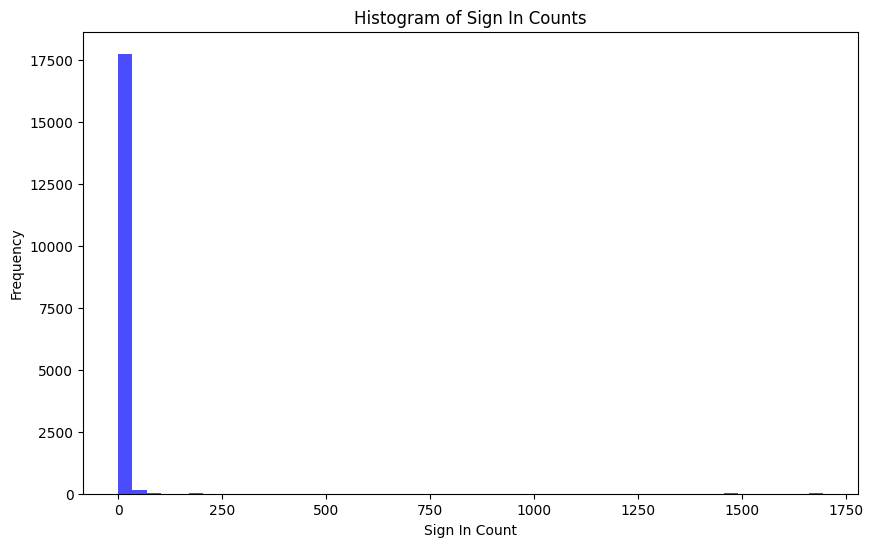

(50,
 50,
                                   Dog ID  Sign_in_Count
 4   fd27b86c-7144-11e5-ba71-058fbc01cf0b          181.0
 6   fd27ba1a-7144-11e5-ba71-058fbc01cf0b          181.0
 43  fd27e9a4-7144-11e5-ba71-058fbc01cf0b          181.0
 45  fd27ed46-7144-11e5-ba71-058fbc01cf0b          181.0
 61  fd3ccf2c-7144-11e5-ba71-058fbc01cf0b          355.0)

In [19]:
# Analyzing Sign in Count for outliers
signin_counts = dognition_data['Sign_in_Count']

# Plotting a histogram for Sign_in_Count
plt.figure(figsize=(10, 6))
plt.hist(signin_counts, bins=50, color='blue', alpha=0.7)
plt.xlabel('Sign In Count')
plt.ylabel('Frequency')
plt.title('Histogram of Sign In Counts')
plt.show()

# Identifying potential outliers (e.g., Sign In Count greater than 175)
outlier_threshold = 175
outlier_signins = dognition_data[dognition_data['Sign_in_Count'] > outlier_threshold]

outlier_signins_count = outlier_signins.shape[0]
outlier_dog_ids = outlier_signins['Dog ID'].nunique()

outlier_signins_count, outlier_dog_ids, outlier_signins[['Dog ID', 'Sign_in_Count']].head()



1. **Histogram Overview**:
   - The histogram of sign-in counts shows a distribution skewed towards lower counts, with a few outliers having very high sign-in counts.

2. **Outliers Analysis**:
   - There are **50 entries** with a sign-in count greater than 175.
   - These entries correspond to **50 unique Dog IDs**.
   - Example entries with high sign-in counts include Dog IDs with counts like 181 and even as high as 355.

# Exercise 2



This exercise focuses on examining the features of dogs that correlate with differences in the number of tests they complete in the Dognition program. We will analyze the data to identify trends related to dog characteristics such as breed type, breed group, and personality dimensions (Dimension), and their impact on the total number of tests completed.

The key steps for this analysis:

1. **Analyze Dog Features**:
   - Investigate how 'Breed Type', 'Breed Group', and 'Dimension' relate to the 'Total Tests Completed'.
   - Use statistical summaries and visualizations to explore these relationships.

2. **Inter-Test Intervals (ITI) Analysis**:
   - Examine the relationship between the inter-test intervals (Mean and Median ITI) and the total number of tests completed.

## Step 1: Analyze Dog Features

We will create visualizations to explore how the 'Total Tests Completed' varies with different dog features like 'Breed Type', 'Breed Group', and 'Dimension'. These visualizations will help us understand if certain characteristics are associated with a higher number of tests completed.


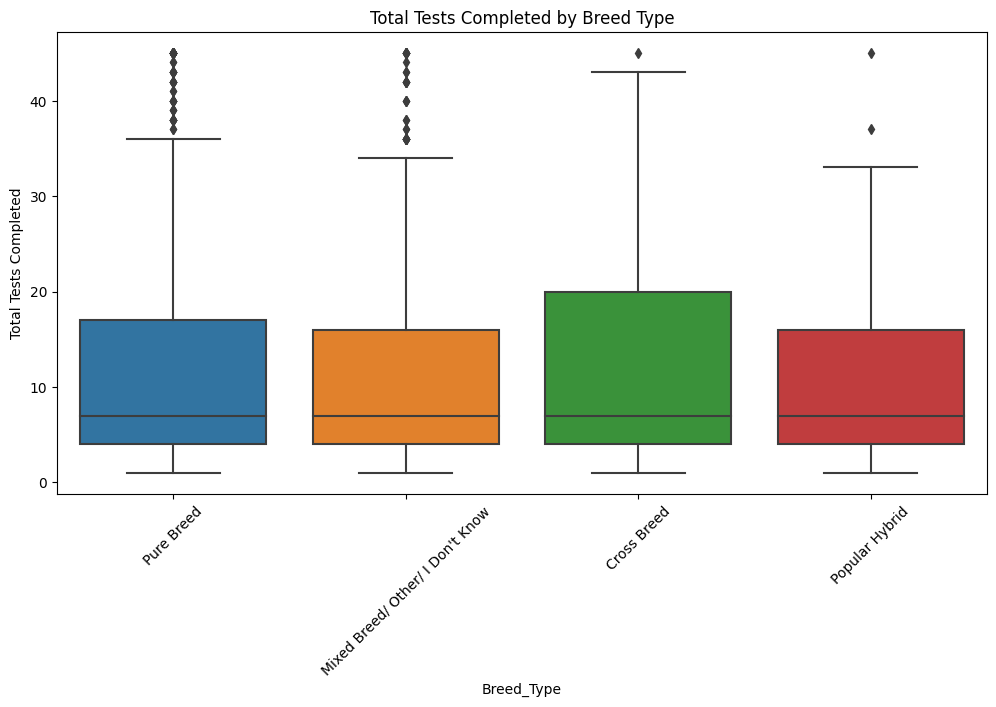

In [25]:
# Visualization 1: Total Tests Completed vs Breed Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Breed_Type', y='Total Tests Completed', data=dognition_data)
plt.title('Total Tests Completed by Breed Type')
plt.xticks(rotation=45)
plt.show()

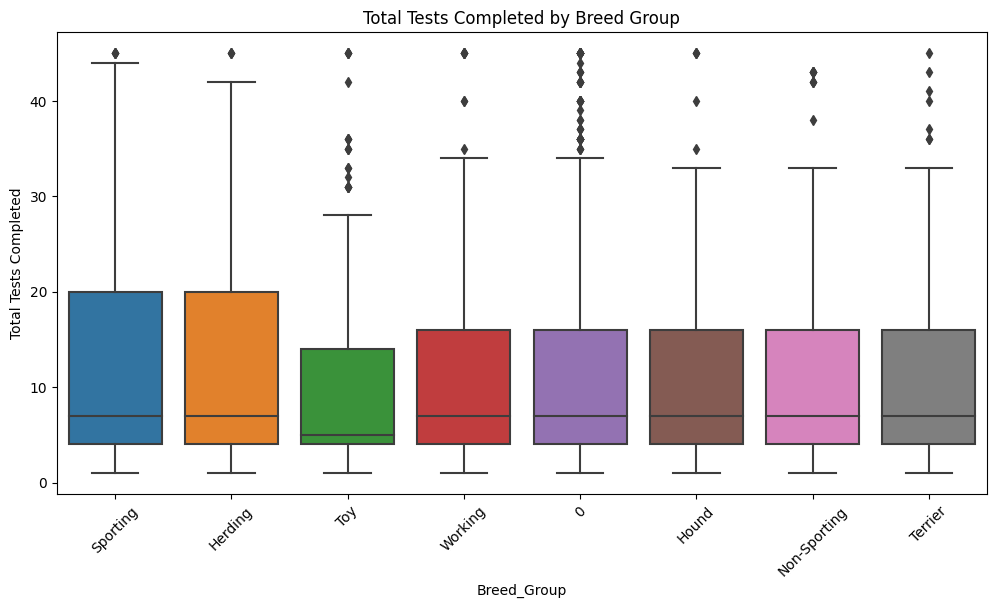

In [26]:
# Visualization 2: Total Tests Completed vs Breed Group
plt.figure(figsize=(12, 6))
sns.boxplot(x='Breed_Group', y='Total Tests Completed', data=dognition_data)
plt.title('Total Tests Completed by Breed Group')
plt.xticks(rotation=45)
plt.show()

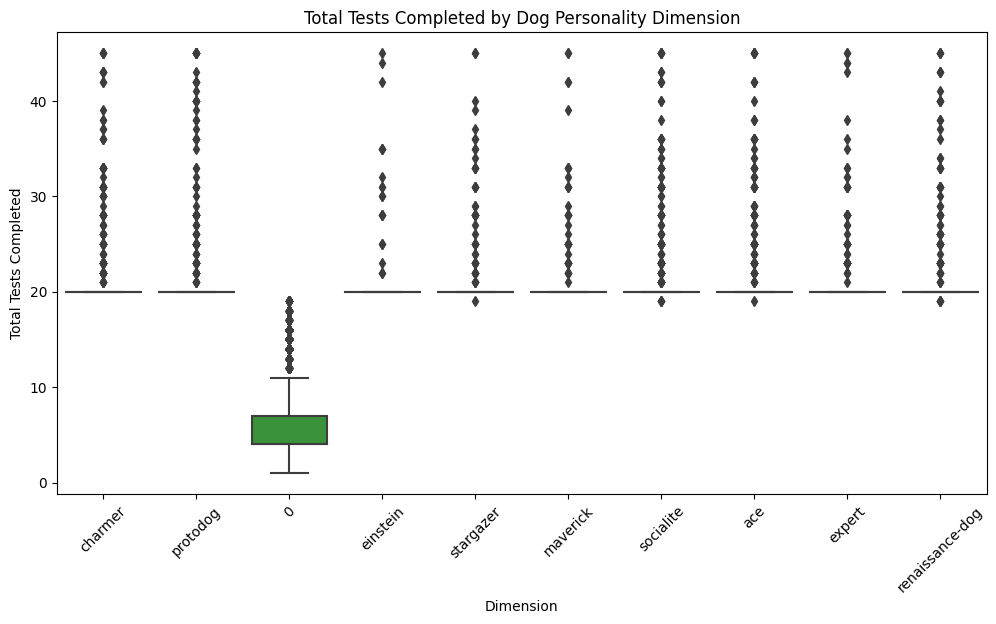

In [27]:
# Visualization 3: Total Tests Completed vs Dimension (Personality Type)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Dimension', y='Total Tests Completed', data=dognition_data)
plt.title('Total Tests Completed by Dog Personality Dimension')
plt.xticks(rotation=45)
plt.show()

Let's begin with the analysis of dog features.

The visualizations provide a detailed look at the relationship between different dog features and the total number of tests completed in the Dognition program:

1. **Total Tests Completed by Breed Type**: This visualization shows how the total tests completed vary among different breed types, such as 'Cross Breed', 'Mixed Breed', 'Popular Hybrid', and 'Pure Breed'.

2. **Total Tests Completed by Breed Group**: This chart illustrates the variation in test completion across different breed groups, like 'Herding', 'Hound', 'Non-Sporting', 'Sporting', 'Terrier', 'Toy', and 'Working'.

3. **Total Tests Completed by Dog Personality Dimension (Dimension)**: Here, we see the distribution of test completions across various personality dimensions assigned to dogs, such as 'Ace', 'Charmer', 'Einstein', 'Expert', 'Maverick', 'Protodog', 'Renaissance-dog', 'Socialite', and 'Stargazer'.

### Observations from Visualizations:
- **Breed Type and Group**: Certain breed types and groups may show a higher or lower average number of tests completed, which could indicate varying levels of engagement or interest in the Dognition program.
- **Personality Dimensions**: The number of tests completed might vary significantly among different personality dimensions, suggesting that dogs' cognitive styles or personality types could influence their engagement with cognitive tests.


## Step 3: Inter-Test Intervals (ITI) Analysis

Next, we'll perform the Inter-Test Intervals (ITI) analysis to understand the relationship between the time intervals between tests and the total tests completed. Let's proceed with that analysis.

After exploring the dog features, we will examine the relationship between the inter-test intervals and the total number of tests completed. This will include analyzing both the 'Mean ITI (minutes)' and 'Median ITI (minutes)'.

In [28]:
# Correlation Analysis: Total Tests Completed vs Mean and Median ITI
correlation_mean_iti = dognition_data['Total Tests Completed'].corr(dognition_data['Mean ITI (minutes)'])
correlation_median_iti = dognition_data['Total Tests Completed'].corr(dognition_data['Median ITI (minutes)'])

# Displaying the correlation results
correlation_mean_iti, correlation_median_iti

(0.06746136981121033, -0.03611980458702897)


The correlation analysis between 'Total Tests Completed' and the inter-test intervals (ITI) yields the following results:

1. **Correlation between Total Tests Completed and Mean ITI (minutes)**: The correlation coefficient is approximately 0.067, indicating a weak positive correlation. This suggests that, on average, a slight increase in the mean time between tests might be associated with a higher number of tests completed, but the relationship is not strong.

2. **Correlation between Total Tests Completed and Median ITI (minutes)**: The correlation coefficient is approximately -0.036, indicating a weak negative correlation. This implies that a slight decrease in the median time between tests might be associated with a higher number of tests completed, but again, the relationship is very weak.

### Interpretation and Recommendations:

- **Weak Correlations**: The weak correlations indicate that the time intervals between tests (both mean and median) do not strongly influence the total number of tests completed. This suggests that factors other than the frequency of test-taking might be more significant in determining how many tests dogs complete.
  
- **Focus on Dog Features**: Given the more pronounced differences observed in the visualizations related to dog features (such as breed type, breed group, and personality dimensions), these factors might provide more actionable insights for strategies to increase test completion rates.

- **Tailored Strategies**: Dognition could consider tailoring their engagement strategies based on breed characteristics and personality dimensions, as these factors seem to have a more noticeable impact on test completion.

This analysis provides valuable insights into which dog characteristics are associated with higher engagement in the Dognition program and can guide efforts to increase test completion rates.

# Exercise 3

# Exercise 4


# Exercise 4

